In [1]:
mohs_test = pd.read_csv("mohs_test_with_complexity_scores.csv")
features = mohs_test.iloc[:, 3:13]
target_visit_duration = mohs_test['Duration of Visit (min)']
target_stages = mohs_test['Number of stages']
target_aneshetic = mohs_test['Anesthetic Amount (ml)']

NameError: name 'pd' is not defined

In [2]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mohs_test = pd.read_csv("mohs_test_with_complexity_scores.csv")
all_features = mohs_test.iloc[:, 3:13]

for col in all_features.columns:
    if all_features[col].dtype == 'object':
        all_features[col] = all_features[col].astype('category')

target_visit_duration = mohs_test['Duration of Visit (min)']
target_stages = mohs_test['Number of stages']
target_aneshetic = mohs_test['Anesthetic Amount (ml)']

targets = {
    "Number of Stages": target_stages,
    "Duration of Visit": target_visit_duration,
    "Anesthetic Amount": target_aneshetic
}

model_dir = "models"

model_files = {
    "Number of Stages": "xgb_regressor_number_of_stages.pkl",
    "Duration of Visit": "xgb_regressor_visit_duration.pkl",
    "Anesthetic Amount": "xgb_regressor_anesthetic_amount.pkl"
}

full_feature_list = [
    'Lesion  Size (cm)',
    'Recurrent Tumor (Y/N)',
    'Aggressive Histology (Y/N)',
    'Wound Management (H/M/L)',
    'Location (H/M/L)',
    'Treatment Delay (days)',
    'Age (years)',
    'Immunosuppressed (Y/N)',
    'Bleeding Risk (Y/N)',
    'Greater Average Time (Y/N)'
]


results = []

for name, file in model_files.items():
    model_path = f"{model_dir}/{file}"
    model = joblib.load(model_path)
    target = targets[name]

    X_train, X_test, y_train, y_test = train_test_split(
        all_features, target, test_size=0.4, random_state=42
    )

    for df in [X_train, X_test]:
        for col in df.columns:
            if df[col].dtype.name == 'object':
                df[col] = df[col].astype('category')

    expected_n_features = model.n_features_in_
    if expected_n_features == len(full_feature_list):
        X_train_aligned = X_train[full_feature_list]
        X_test_aligned = X_test[full_feature_list]
    elif expected_n_features == len(reduced_feature_list):
        X_train_aligned = X_train[reduced_feature_list]
        X_test_aligned = X_test[reduced_feature_list]
    else:
        raise ValueError(f"Unexpected feature count for model {name} ({expected_n_features}).")

    # Predictions
    y_pred_train = model.predict(X_train_aligned)
    y_pred_test = model.predict(X_test_aligned)

    # Metrics for training data
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    # Metrics for test data
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    results.append({
        "Model": name,
        "Train RMSE": round(train_rmse, 2),
        "Train MAE": round(train_mae, 2),
        "Train R²": round(train_r2, 2),
        "Test RMSE": round(test_rmse, 2),
        "Test MAE": round(test_mae, 2),
        "Test R²": round(test_r2, 2)
    })



metrics_df = pd.DataFrame(results)
print(metrics_df)

               Model  Train RMSE  Train MAE  Train R²  Test RMSE  Test MAE  \
0   Number of Stages        0.44       0.34      0.72       0.44      0.34   
1  Duration of Visit        9.77       7.60      0.97       9.83      7.64   
2  Anesthetic Amount        1.46       1.13      0.94       1.46      1.14   

   Test R²  
0     0.71  
1     0.97  
2     0.94  


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [3]:
metrics_df

,Model,Train RMSE,Train MAE,Train R²,Test RMSE,Test MAE,Test R²
0,Number of Stages,0.44,0.34,0.72,0.44,0.34,0.71
1,Duration of Visit,9.77,7.60,0.97,9.83,7.64,0.97
2,Anesthetic Amount,1.46,1.13,0.94,1.46,1.14,0.94



🔎 Feature importance for model: Number of Stages
                      Feature  Importance
1       Recurrent Tumor (Y/N)    0.347879
2  Aggressive Histology (Y/N)    0.170697
4            Location (H/M/L)    0.153255
7      Immunosuppressed (Y/N)    0.131014
0           Lesion  Size (cm)    0.058583
9  Greater Average Time (Y/N)    0.030478
8         Bleeding Risk (Y/N)    0.029492
6                 Age (years)    0.027016
5      Treatment Delay (days)    0.026527
3    Wound Management (H/M/L)    0.025059


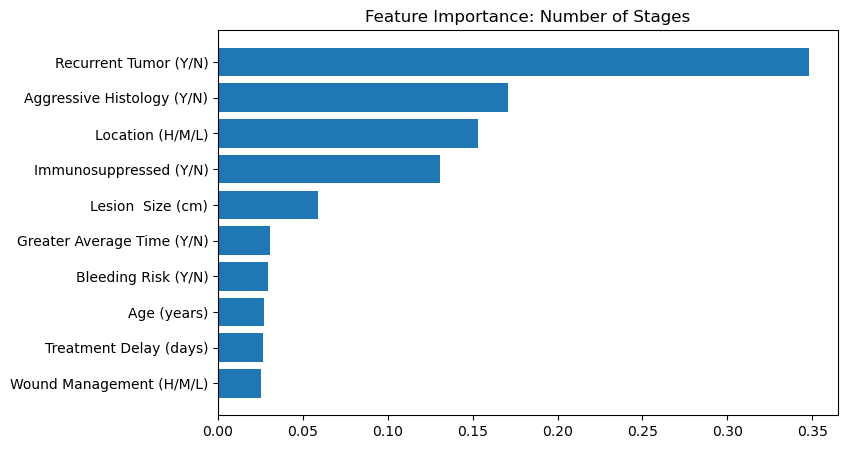


🔎 Feature importance for model: Duration of Visit
                      Feature  Importance
0           Lesion  Size (cm)    0.276513
3    Wound Management (H/M/L)    0.243502
2  Aggressive Histology (Y/N)    0.113238
8         Bleeding Risk (Y/N)    0.090083
1       Recurrent Tumor (Y/N)    0.082605
9  Greater Average Time (Y/N)    0.067194
7      Immunosuppressed (Y/N)    0.066392
4            Location (H/M/L)    0.033138
6                 Age (years)    0.016679
5      Treatment Delay (days)    0.010657


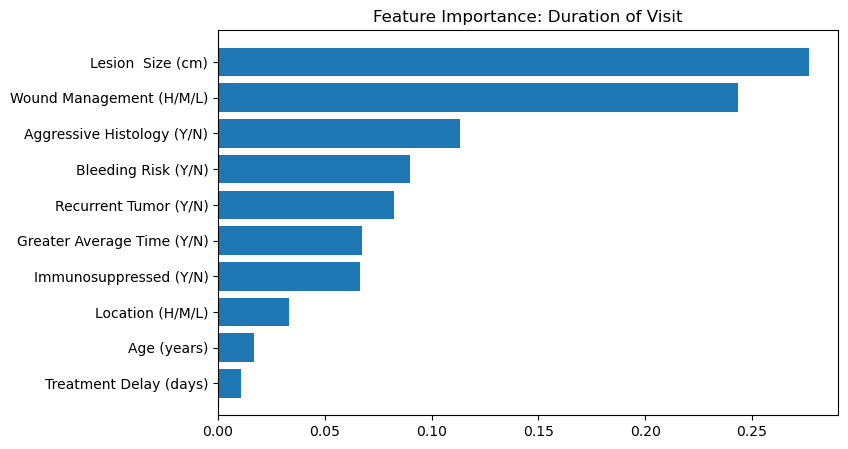


🔎 Feature importance for model: Anesthetic Amount
                      Feature  Importance
3    Wound Management (H/M/L)    0.287337
0           Lesion  Size (cm)    0.190349
8         Bleeding Risk (Y/N)    0.158471
2  Aggressive Histology (Y/N)    0.126835
7      Immunosuppressed (Y/N)    0.116744
1       Recurrent Tumor (Y/N)    0.066408
6                 Age (years)    0.023718
4            Location (H/M/L)    0.017763
5      Treatment Delay (days)    0.008140
9  Greater Average Time (Y/N)    0.004235


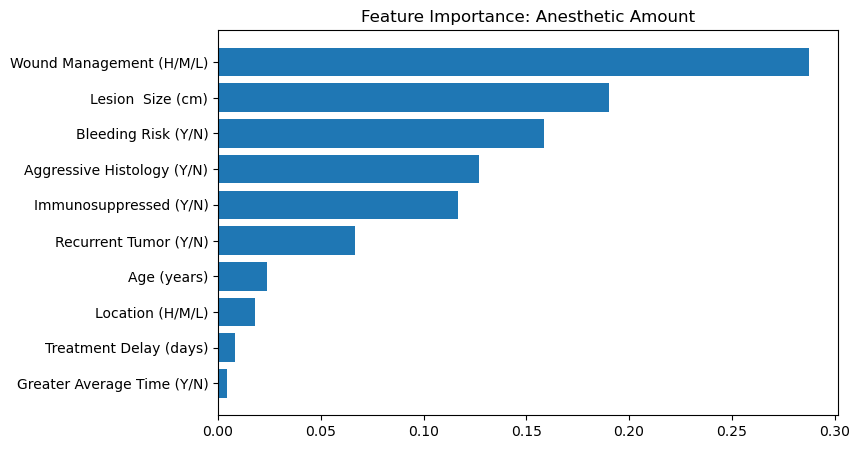

In [4]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
model_dir = "models"

model_files = {
    "Number of Stages": "xgb_regressor_number_of_stages.pkl",
    "Duration of Visit": "xgb_regressor_visit_duration.pkl",
    "Anesthetic Amount": "xgb_regressor_anesthetic_amount.pkl"
}

# Canonical feature list (same as your training features)
feature_list = [
    'Lesion  Size (cm)',
    'Recurrent Tumor (Y/N)',
    'Aggressive Histology (Y/N)',
    'Wound Management (H/M/L)',
    'Location (H/M/L)',
    'Treatment Delay (days)',
    'Age (years)',
    'Immunosuppressed (Y/N)',
    'Bleeding Risk (Y/N)',
    'Greater Average Time (Y/N)'
]

reduced_feature_list = [f for f in feature_list if f != 'Greater Average Time (Y/N)']

for name, file in model_files.items():
    print(f"\n🔎 Feature importance for model: {name}")
    model_path = f"{model_dir}/{file}"
    model = joblib.load(model_path)

    n_importances = len(model.feature_importances_)

    # Align feature list based on number of features used by the model
    if n_importances == len(feature_list):
        used_features = feature_list
    elif n_importances == len(reduced_feature_list):
        used_features = reduced_feature_list
    else:
        used_features = [f"Feature_{i}" for i in range(n_importances)]
        print(f"⚠️ Feature count mismatch for {name} — using generic feature names.")

    # Create importance DataFrame
    importance_df = pd.DataFrame({
        "Feature": used_features,
        "Importance": model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    print(importance_df)

    # Optional: visualize
    plt.figure(figsize=(8, 5))
    plt.barh(importance_df["Feature"], importance_df["Importance"])
    plt.title(f"Feature Importance: {name}")
    plt.gca().invert_yaxis()
    plt.show()

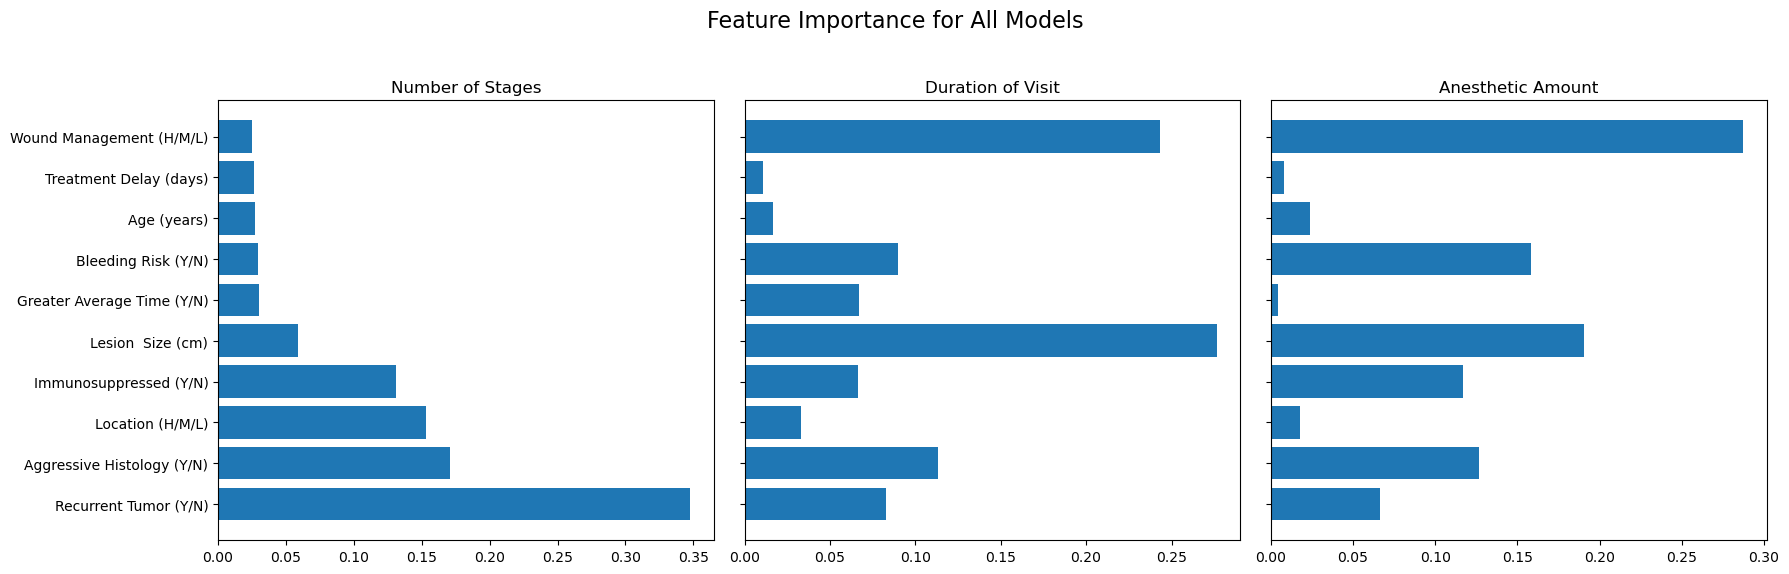

In [5]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
model_dir = "models"

model_files = {
    "Number of Stages": "xgb_regressor_number_of_stages.pkl",
    "Duration of Visit": "xgb_regressor_visit_duration.pkl",
    "Anesthetic Amount": "xgb_regressor_anesthetic_amount.pkl"
}

# Canonical feature list
feature_list = [
    'Lesion  Size (cm)',
    'Recurrent Tumor (Y/N)',
    'Aggressive Histology (Y/N)',
    'Wound Management (H/M/L)',
    'Location (H/M/L)',
    'Treatment Delay (days)',
    'Age (years)',
    'Immunosuppressed (Y/N)',
    'Bleeding Risk (Y/N)',
    'Greater Average Time (Y/N)'
]

reduced_feature_list = [f for f in feature_list if f != 'Greater Average Time (Y/N)']

# Prepare plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("Feature Importance for All Models", fontsize=16)

for idx, (name, file) in enumerate(model_files.items()):
    model_path = f"{model_dir}/{file}"
    model = joblib.load(model_path)

    n_importances = len(model.feature_importances_)

    # Align feature list
    if n_importances == len(feature_list):
        used_features = feature_list
    elif n_importances == len(reduced_feature_list):
        used_features = reduced_feature_list
    else:
        used_features = [f"Feature_{i}" for i in range(n_importances)]
        print(f"⚠️ Feature count mismatch for {name} — using generic names.")

    # Create importance DataFrame
    importance_df = pd.DataFrame({
        "Feature": used_features,
        "Importance": model.feature_importances_
    }).sort_values(by="Importance", ascending=True)  # Sort ascending for horizontal bar

    # Plot on appropriate subplot
    axes[idx].barh(importance_df["Feature"], importance_df["Importance"])
    axes[idx].set_title(name)
    axes[idx].invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()